# House Prices: Data filtering

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [158]:
df=pd.read_csv('/content/Delhi_v2.csv')

In [159]:
df.head()

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,NaN,Flat,\n\n\n This pro...,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,3.0,NaN,Flat,\n\n\n The prop...,4592.592593


In [160]:
df.shape

(7738, 18)

<Axes: >

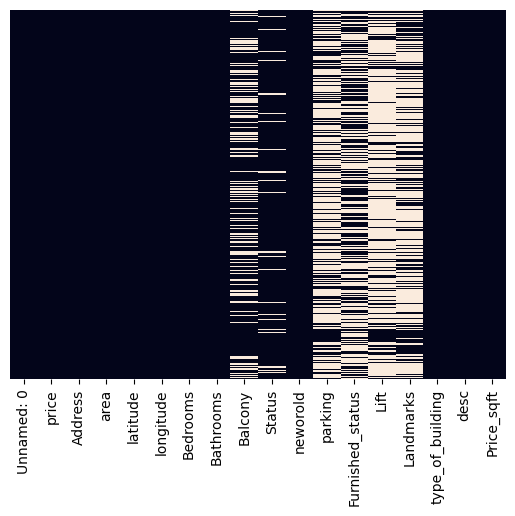

In [161]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7738 non-null   int64  
 1   price             7738 non-null   float64
 2   Address           7738 non-null   object 
 3   area              7738 non-null   float64
 4   latitude          7738 non-null   float64
 5   longitude         7738 non-null   float64
 6   Bedrooms          7738 non-null   float64
 7   Bathrooms         7738 non-null   float64
 8   Balcony           5166 non-null   float64
 9   Status            7164 non-null   object 
 10  neworold          7738 non-null   object 
 11  parking           2612 non-null   float64
 12  Furnished_status  4124 non-null   object 
 13  Lift              1733 non-null   float64
 14  Landmarks         2759 non-null   object 
 15  type_of_building  7738 non-null   object 
 16  desc              7738 non-null   object 


In [163]:
df['price'] = df['price'].astype(int)
df['Price_sqft'] = df['Price_sqft'].astype(int)
df['Bedrooms'] = df['Bedrooms'].astype(int)
df['Bathrooms'] = df['Bathrooms'].astype(int)
df['area'] = df['area'].astype(int)

In [164]:
df.isnull().sum()

Unnamed: 0             0
price                  0
Address                0
area                   0
latitude               0
longitude              0
Bedrooms               0
Bathrooms              0
Balcony             2572
Status               574
neworold               0
parking             5126
Furnished_status    3614
Lift                6005
Landmarks           4979
type_of_building       0
desc                   0
Price_sqft             0
dtype: int64

In [165]:
df.isnull().mean()*100

Unnamed: 0           0.000000
price                0.000000
Address              0.000000
area                 0.000000
latitude             0.000000
longitude            0.000000
Bedrooms             0.000000
Bathrooms            0.000000
Balcony             33.238563
Status               7.417937
neworold             0.000000
parking             66.244508
Furnished_status    46.704575
Lift                77.604032
Landmarks           64.344792
type_of_building     0.000000
desc                 0.000000
Price_sqft           0.000000
dtype: float64

In [166]:
df['Balcony']=df['Balcony'].fillna(df['Balcony'].mean())

In [167]:
df.drop(['Lift','Landmarks','parking'],axis=1,inplace=True)

In [168]:
df.isnull().sum()

Unnamed: 0             0
price                  0
Address                0
area                   0
latitude               0
longitude              0
Bedrooms               0
Bathrooms              0
Balcony                0
Status               574
neworold               0
Furnished_status    3614
type_of_building       0
desc                   0
Price_sqft             0
dtype: int64

In [169]:
df.drop(['Unnamed: 0','Address','latitude', 'longitude','Status','neworold','Furnished_status','type_of_building','desc'],axis=1,inplace=True)

In [170]:
df['Balcony'] = df['Balcony'].astype(int)

<Axes: >

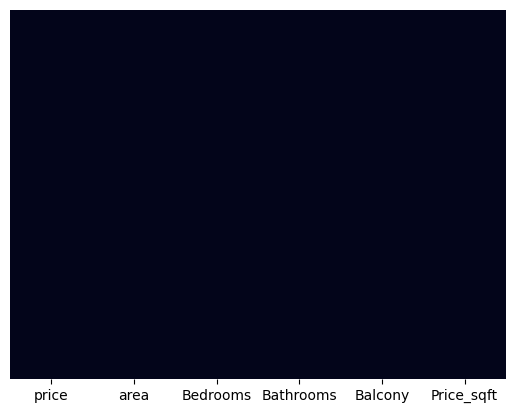

In [171]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [172]:
df.shape

(7738, 6)

In [173]:
df.describe()

,price,area,Bedrooms,Bathrooms,Balcony,Price_sqft
count,7.738000e+03,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000
mean,8.320635e+06,1409.506591,2.708193,2.501163,2.284699,5543.238304
std,7.223197e+06,718.929581,0.877026,0.867050,0.907924,2408.674376
min,1.700000e+06,501.000000,2.000000,2.000000,1.000000,2100.000000
25%,4.200000e+06,990.000000,2.000000,2.000000,2.000000,3950.500000
50%,6.000000e+06,1250.000000,3.000000,2.000000,2.000000,4972.000000
75%,9.500000e+06,1650.000000,3.000000,3.000000,3.000000,6349.750000
max,8.500000e+07,9500.000000,10.000000,10.000000,10.000000,44378.000000


<Axes: >

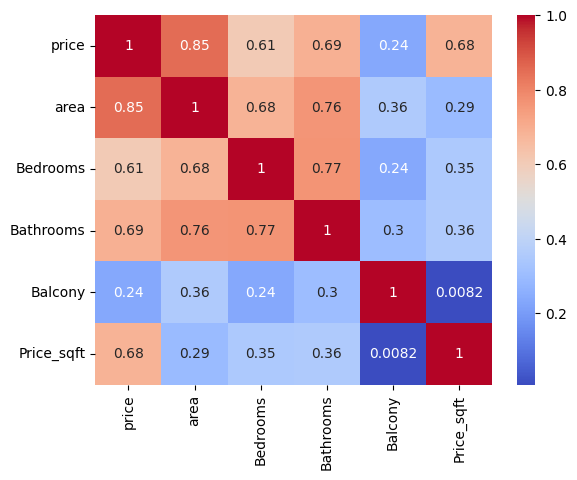

In [174]:
num_val= ['price','area','Bedrooms','Bathrooms','Balcony','Price_sqft']
sns.heatmap(df[num_val].corr(),cmap='coolwarm',annot=True)

In [175]:
df.head()

,price,area,Bedrooms,Bathrooms,Balcony,Price_sqft
0,5600000,1350,3,3,2,4148
1,8800000,1490,3,3,2,5906
2,16500000,2385,4,5,2,6918
3,3810000,1050,2,2,3,3628
4,6200000,1350,2,2,3,4592


In [176]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [177]:
df.tail()

,price,area,Bedrooms,Bathrooms,Balcony,Price_sqft
7733,7900000,1095,2,2,2,7214
7734,4510000,1060,2,2,3,4254
7735,7000000,1898,4,3,5,3688
7736,6500000,1400,3,3,2,4642
7737,6500000,1750,3,2,3,3714


In [178]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')


    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()



In [179]:
df['Price_sqft'].describe()

count     7738.000000
mean      5543.238304
std       2408.674376
min       2100.000000
25%       3950.500000
50%       4972.000000
75%       6349.750000
max      44378.000000
Name: Price_sqft, dtype: float64

******* price *******


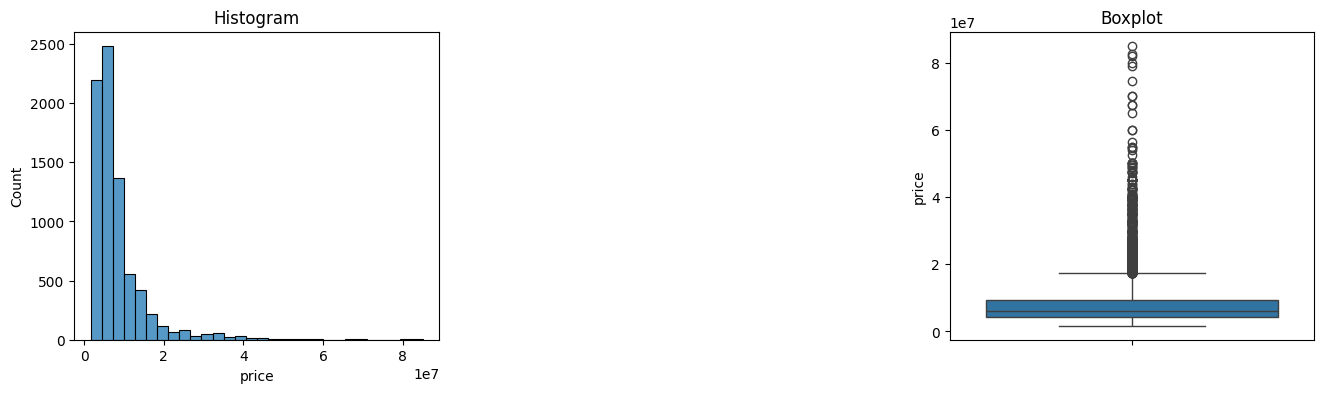

******* area *******


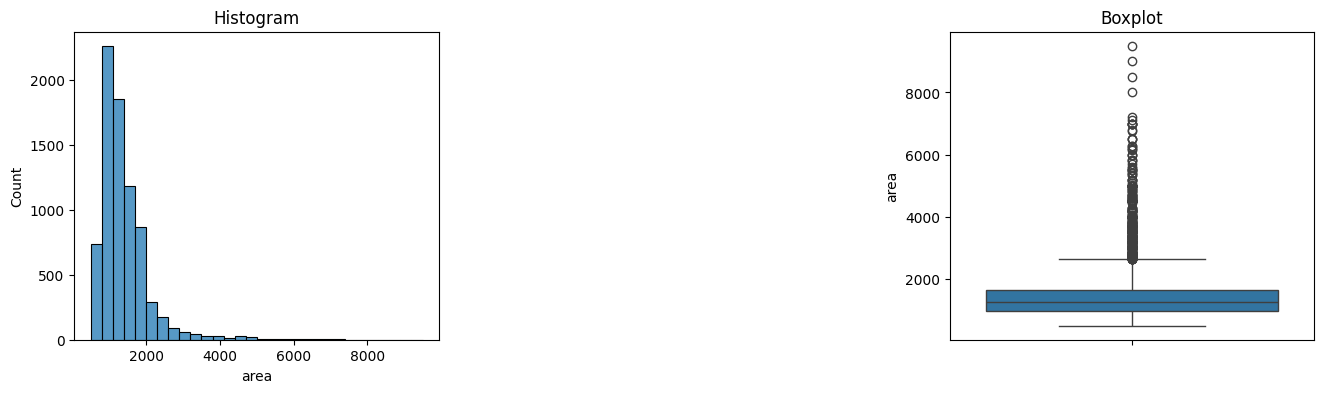

******* Bedrooms *******


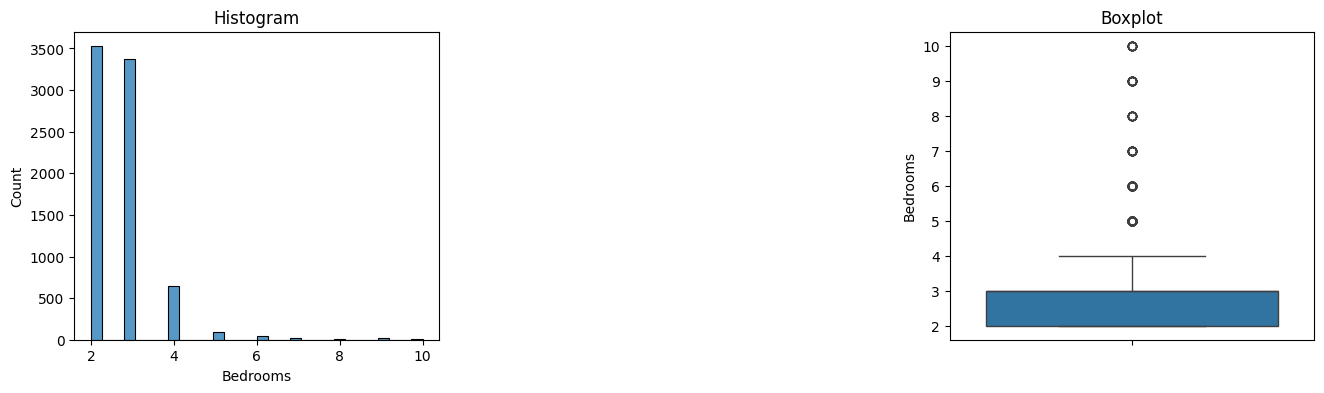

******* Bathrooms *******


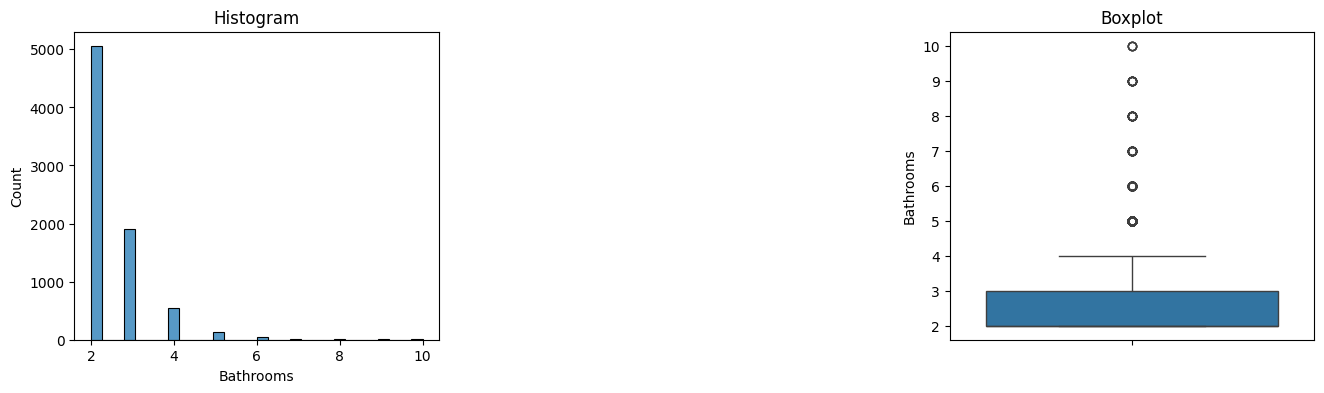

******* Balcony *******


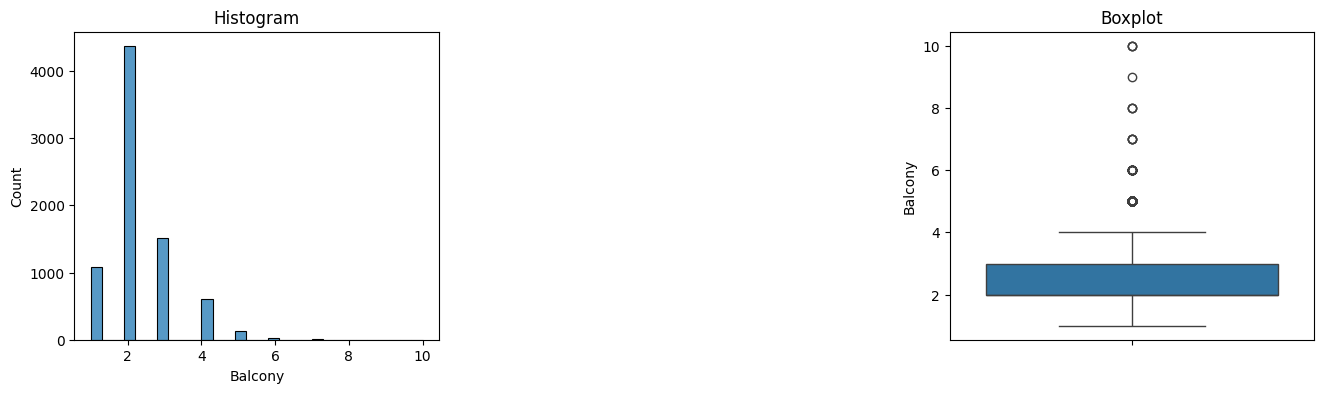

******* Price_sqft *******


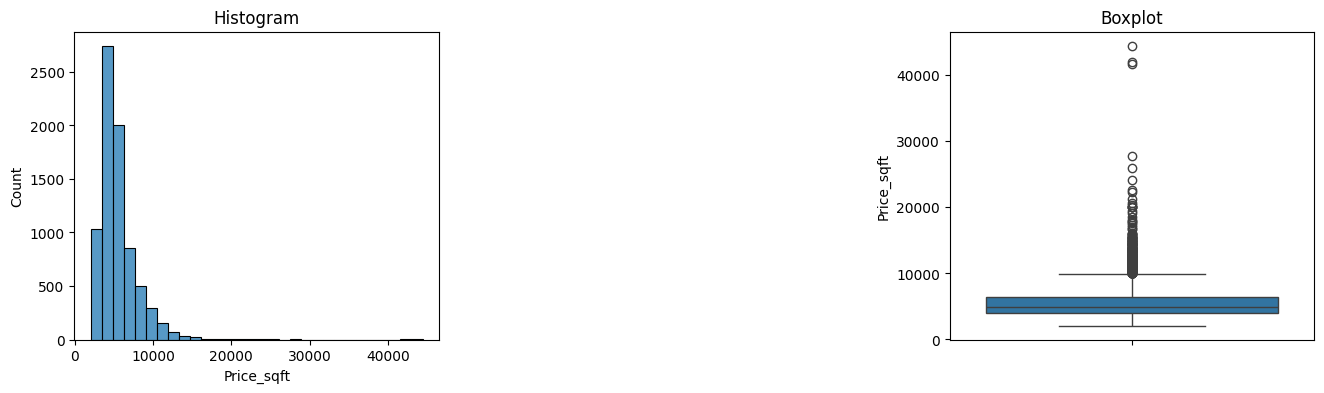

In [180]:
num_val= ['price','area','Bedrooms','Bathrooms','Balcony','Price_sqft']
for var in num_val:
  print("******* {} *******".format(var))
  diagnostic_plots(df, var)

## This is formatted as code


In [182]:
X = df.drop(['price'], axis=1)
Y = df['price']

In [190]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [191]:
print(X.shape, X_train.shape, X_test.shape)

(7738, 5) (6190, 5) (1548, 5)


In [192]:
print(Y.shape, Y_train.shape, Y_test.shape)

(7738,) (6190,) (1548,)


# Model Training

*XGBoost* Regressor

In [193]:
model = XGBRegressor()

In [194]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Evaluation

In [195]:
training_data_prediction = model.predict(X_train)

In [196]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9986770892975638
Mean Absolute Error :  65543.86791195476


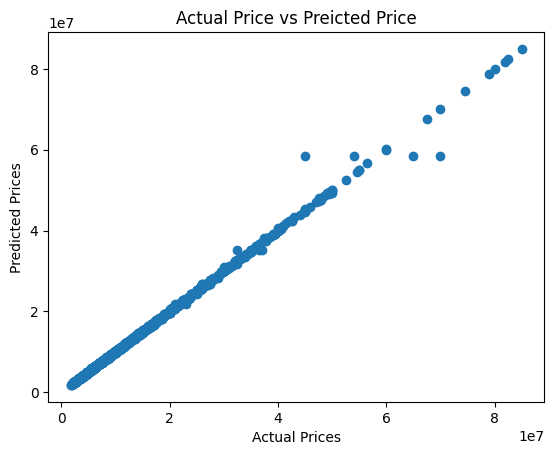

In [197]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [198]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [199]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9967915511692425
Mean Absolute Error :  143322.08825904393


In [204]:
### Create a Pickle file using serialization
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [ ]:
df.to_csv('final.csv', index=False)

In [ ]:
final_df=pd.read_csv('/content/final.csv')

In [ ]:
final_df.shape

(7738, 8)